In [2]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

File_ID = '114gprNUxtpoEjMAP2NqE0XClmbEBqfWI'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('circles.jpg')

In [0]:
extract_r = np.zeros([3,3,3])
extract_g = np.zeros([3,3,3])
extract_b = np.zeros([3,3,3])
sobel = [[-1.0, -2.0, -1.0],[0., 0., 0.],[1.0,2.0,1.0]]


extract_b[:,:,1] = sobel
extract_b[:,:,2] = sobel

extract_g[:,:,0] = sobel
extract_g[:,:,2] = sobel

extract_r[:,:,0] = sobel
extract_r[:,:,1] = sobel

extract_r = extract_r/8
extract_g = extract_g/8

extract_b = extract_b/8

In [4]:
extract_r

array([[[-0.125, -0.125,  0.   ],
        [-0.25 , -0.25 ,  0.   ],
        [-0.125, -0.125,  0.   ]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 0.125,  0.125,  0.   ],
        [ 0.25 ,  0.25 ,  0.   ],
        [ 0.125,  0.125,  0.   ]]])

In [0]:
def convolve3D(image,kernel):
  tmp = kernel.shape[0]
  opx = image.shape[0] - tmp + 1
  opy = image.shape[1] - tmp + 1
  op_img = np.zeros([opx,opy])
  for img_i in range(1,image.shape[0]-1):
    for img_j in range(1,image.shape[1]-1):
      op_pix_val = 0.0
      for i in range(-1,2):
        for j in range(-1,2):
          for k in range(-1,2):
            op_pix_val = op_pix_val + (image[img_i+i,img_j+j,1+k]*kernel[i+1,j+1,k+1])
#       op_img[img_i-1,img_j-1] = int(op_pix_val)  
      if op_pix_val > 0:
        op_img[img_i-1,img_j-1] = int(op_pix_val)
      else:
        op_img[img_i-1,img_j-1] = 0
  return op_img
            

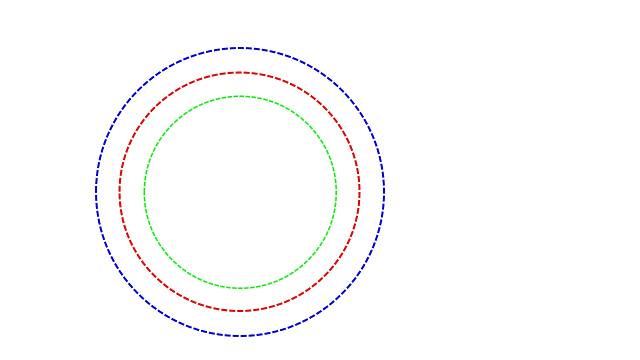

In [61]:
img=cv2.imread('circles.jpg')
img=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
red = convolve3D(img,extract_r)
green = convolve3D(img,extract_g)
blue = convolve3D(img,extract_b)

In [0]:
#filters for highlighting respected colors
red[red<165]=0
green[green<150]=0
blue[blue<165]=0

# Using Hough Circle

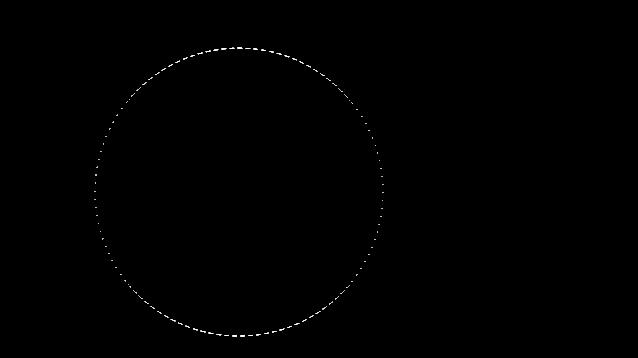

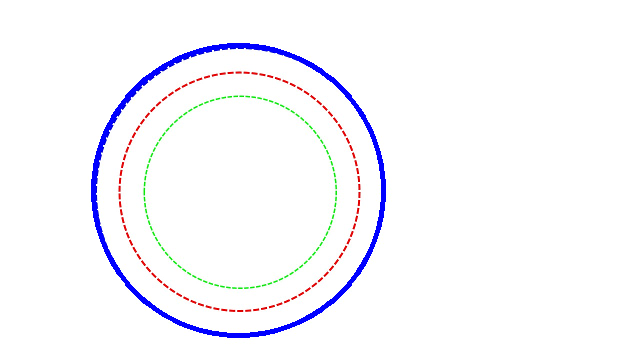

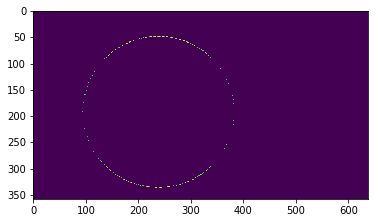

In [67]:
# Blue Circle Detect
img=cv2.imread('circles.jpg')
plt.imshow(blue)
cv2_imshow(blue)
img=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
circles = cv2.HoughCircles(np.uint8(blue),cv2.HOUGH_GRADIENT,3.2,500,param1=50,param2=30,minRadius=0,maxRadius=0)
for i in circles[0,:]:
  cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),3)
      #img,center,radius,color,thickness
cv2_imshow(img)

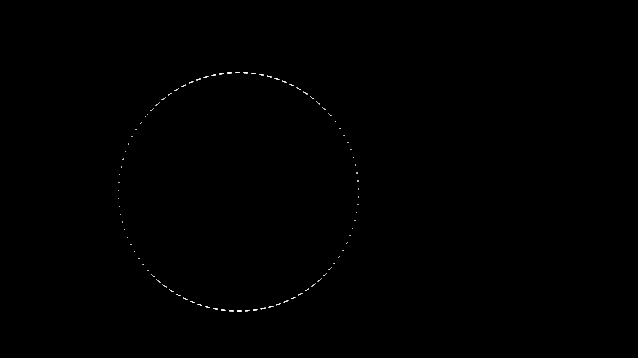

(1, 1, 3)


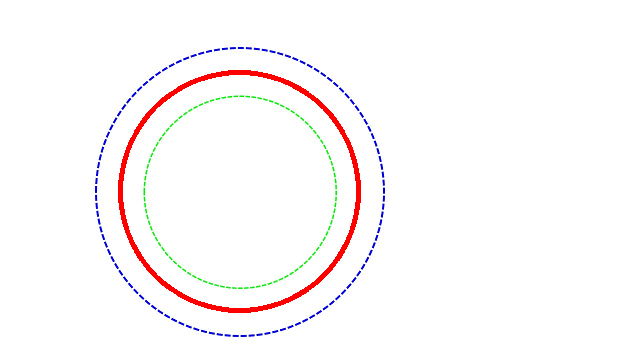

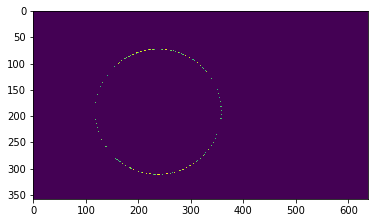

In [68]:
# Red Circle Detect
img=cv2.imread('circles.jpg')
plt.imshow(red)
cv2_imshow(red)
img=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
circles = cv2.HoughCircles(np.uint8(red),cv2.HOUGH_GRADIENT,2,500,param1=50,param2=20,minRadius=0,maxRadius=0)
print(circles.shape)
for i in circles[0,:]:
  cv2.circle(img,(i[0],i[1]),i[2],(0,0,255),4)
cv2_imshow(img)

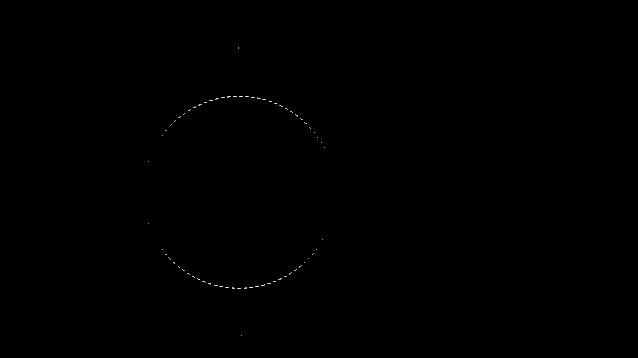

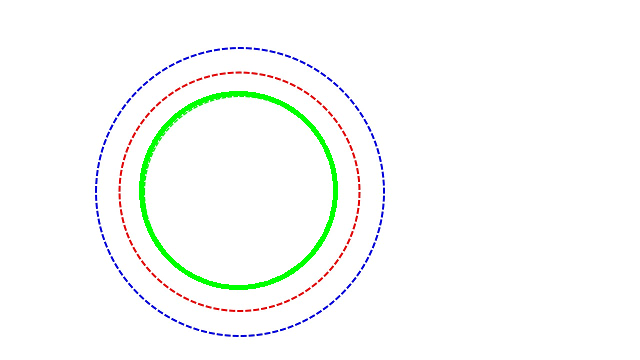

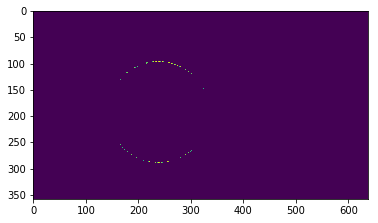

In [66]:
# Green Circle Detect
img = cv2.imread("circles.jpg")
plt.imshow(green)
cv2_imshow(green)
img=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
circlesg = cv2.HoughCircles(np.uint8(green),cv2.HOUGH_GRADIENT,3,1000,param1=50,param2=30,minRadius=0,maxRadius=0)
                           #img,method,inverse of accumulator reslution,min dist between detected circles,
for i in circlesg[0,:]:
  cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),3)
cv2_imshow(img)

# Edge Detection Using **Mask**

In [0]:
boundaries = [
	([0, 0, 80], [50, 56, 255]),
	([8, 0, 0], [250, 12, 50]),
	([0, 4, 0], [50, 250, 50]),
	
] 

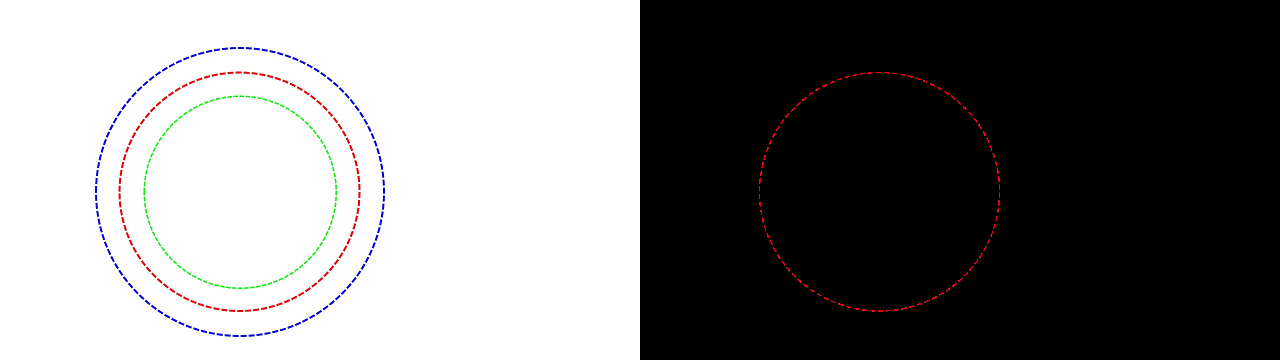

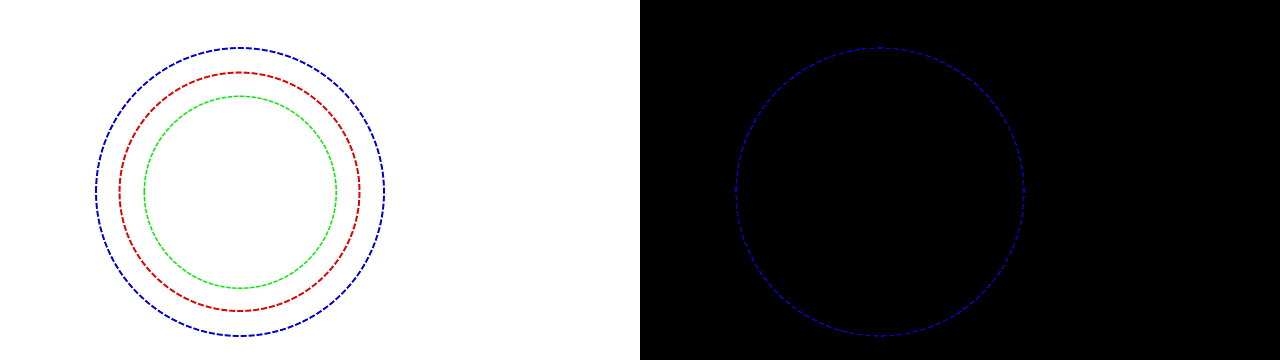

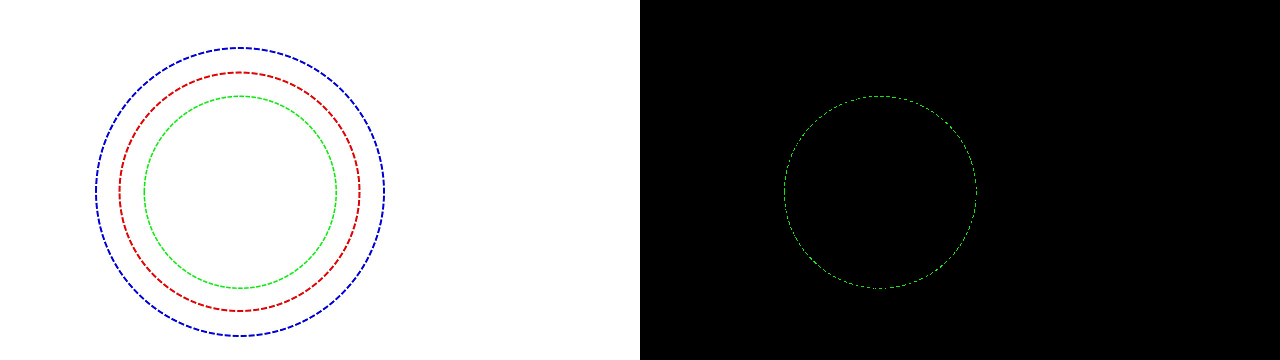

In [11]:
# loop over the boundaries

img = cv2.imread("circles.jpg")
img=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
 
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(img, lower, upper)
	output = cv2.bitwise_and(img, img, mask = mask)
 
	# show the images
	cv2_imshow(np.hstack([img, output]))
	cv2.waitKey(0)